In [3]:
import random
import numpy as np
# 构建一个字典表示对应的游览时间
range_dict = {
1: (10, 30),
2: (20, 60),
3: 30,  
4: (30, 60),
5: (20, 60),
6: (30, 60),
}

adj_matrix = np.array([
        [  0, 300, 360, 210, 530, 475, 500, 690],
        [300,   0, 380, 270, 230, 285, 200, 390],
        [360, 380,   0, 510, 230, 665, 580, 770],
        [210, 270, 510,   0, 470, 265, 450, 640],
        [530, 230, 230, 470,   0, 515, 360, 550],
        [475, 285, 665, 265, 515,   0, 460, 650],
        [500, 200, 580, 450, 360, 460,   0, 190],
        [690, 390, 770, 640, 550, 650, 190,   0]
    ])
    
    # 设置步行速率
speed = 2000 / 60  # 米/分钟
time_matrix = adj_matrix / speed

Generation 1:
最佳路径： [[2, 31], [4, 49], [3, 30], [1, 12], [5, 37], [6, 33]]
最佳时间： 253.84999999999997

Generation 2:
最佳路径： [[2, 31], [4, 49], [3, 30], [1, 12], [5, 37], [6, 33]]
最佳时间： 253.84999999999997

Generation 3:
最佳路径： [[2, 31], [4, 49], [3, 30], [1, 12], [5, 37], [6, 33]]
最佳时间： 253.84999999999997

Generation 4:
最佳路径： [[2, 31], [4, 49], [3, 30], [1, 12], [5, 37], [6, 33]]
最佳时间： 253.84999999999997

Generation 5:
最佳路径： [[2, 31], [4, 57], [3, 30], [1, 12], [5, 37], [6, 39]]
最佳时间： 261.84999999999997

Generation 6:
最佳路径： [[2, 31], [4, 57], [3, 30], [1, 12], [5, 37], [6, 39]]
最佳时间： 261.84999999999997

Generation 7:
最佳路径： [[2, 31], [4, 57], [3, 30], [1, 12], [5, 37], [6, 39]]
最佳时间： 261.84999999999997

Generation 8:
最佳路径： [[2, 31], [4, 57], [3, 30], [1, 12], [5, 37], [6, 39]]
最佳时间： 261.84999999999997

Generation 9:
最佳路径： [[2, 31], [4, 57], [3, 30], [1, 12], [5, 37], [6, 39]]
最佳时间： 261.84999999999997

Generation 10:
最佳路径： [[2, 31], [4, 57], [3, 30], [1, 12], [5, 37], [6, 39]]
最佳时间： 261.84999

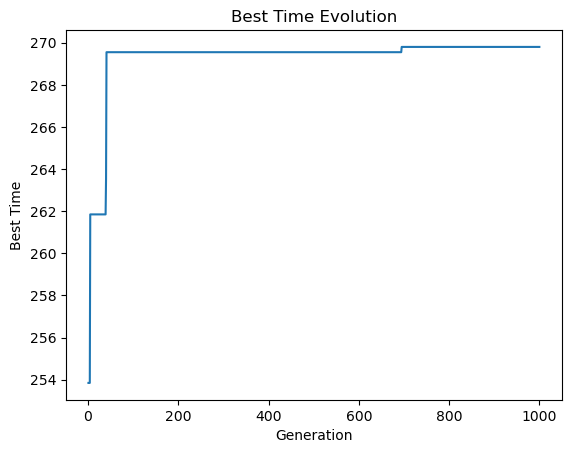

In [4]:
def find_target(nested_list, target):
    # 将二级列表转换为NumPy数组
    nested_array = np.array(nested_list)
    
    # 获取所有子列表的第一个元素
    first_elements = nested_array[:, 0]
    
    # 使用NumPy的索引功能来查找目标数字
    indices = np.where(first_elements == target)[0]
    
    if len(indices) == 0:
        print("Target not found! Nested List:", nested_list, "Target:", target)
    
    return indices


import random
def is_valid_individual(individual):
    """
    判断个体是否满足约束条件
    """
    time,end = calculate_cumulative_times(individual)
    if end > 300:
        return False
    if time[find_target(individual,1)[0]] > 240:
        return False
    return True

def calculate_forest_wait_time(path):
        # 设置邻接矩阵
    adj_matrix = np.array([
        [  0, 300, 360, 210, 530, 475, 500, 690],
        [300,   0, 380, 270, 230, 285, 200, 390],
        [360, 380,   0, 510, 230, 665, 580, 770],
        [210, 270, 510,   0, 470, 265, 450, 640],
        [530, 230, 230, 470,   0, 515, 360, 550],
        [475, 285, 665, 265, 515,   0, 460, 650],
        [500, 200, 580, 450, 360, 460,   0, 190],
        [690, 390, 770, 640, 550, 650, 190,   0]
    ])
    
    # 设置步行速率
    speed = 2000.0 / 60  # 米/分钟
    time_matrix = adj_matrix / speed
    cumulative_times = [time_matrix[0][path[0][0]]]  # 起始节点的累加时间为0
    for i in range(1, len(path)):
        current_node = path[i][0]
        previous_node = path[i - 1][0]
        cumulative_times.append(cumulative_times[i - 1] + time_matrix[previous_node][current_node]+ path[i-1][1])
    index = find_target(path,3)[0]
    arrive_time = cumulative_times[index]   
    wait_time = 30 - arrive_time % 30
    return wait_time

def calculate_cumulative_times(path):
    """
    根据内置的邻接矩阵和路径计算到达每个节点时的时间累加
    :param path: 路径列表，包含按顺序访问的节点和时间
    :return: 到达每个节点时的时间累加
    """
    # 设置邻接矩阵
    adj_matrix = np.array([
        [  0, 300, 360, 210, 530, 475, 500, 690],
        [300,   0, 380, 270, 230, 285, 200, 390],
        [360, 380,   0, 510, 230, 665, 580, 770],
        [210, 270, 510,   0, 470, 265, 450, 640],
        [530, 230, 230, 470,   0, 515, 360, 550],
        [475, 285, 665, 265, 515,   0, 460, 650],
        [500, 200, 580, 450, 360, 460,   0, 190],
        [690, 390, 770, 640, 550, 650, 190,   0]
    ])
    
    # 设置步行速率
    speed = 2000 / 60  # 米/分钟
    time_matrix = adj_matrix / speed
    
    cumulative_times = [time_matrix[0][path[0][0]]]  # 起始节点的累加时间为0
    for i in range(1, len(path)):
        current_node = path[i][0]
        previous_node = path[i - 1][0]
        cumulative_times.append(cumulative_times[i - 1] + time_matrix[previous_node][current_node]+ path[i-1][1])
    waittime = calculate_forest_wait_time(path)
    index = find_target(path,3)[0]
    for i in range(index+1,len(path)):
        cumulative_times[i] = cumulative_times[i] + waittime
    end = path[-1][1] + time_matrix[path[-1][0]][7] + cumulative_times[-1]
    return cumulative_times,end

def initialize_population(population_size):
    """
    初始化种群，随机生成不同的路径作为初始解
    :param population_size: 种群大小
    :return: 生成的种群
    """
    # 构建一个字典表示对应的游览时间
    range_dict = {
        1: (10, 30),
        2: (20, 60),
        3: 30,
        4: (30, 60),
        5: (20, 60),
        6: (30, 60),
    }
    
    population = []
    keys = list(range(1, 7))  # 生成所有可能的键（1到num_points-2）
    
    while len(population) < population_size:
        random.shuffle(keys)  # 随机打乱键的顺序
        path = [[dimension, range_dict[dimension] if isinstance(range_dict[dimension], int) else
                 random.randint(range_dict[dimension][0], range_dict[dimension][1])]
                for dimension in keys[:6]]  # 仅使用前6个键生成个体
        
        if is_valid_individual(path):
            population.append(path)
    
    return population

import random
import copy

import copy

def select_parents(population):
    """
    从种群中选择两个父代
    """ 
    parents = random.sample(population, 2)
    parents_copy = copy.deepcopy(parents)  # 创建父代的深拷贝
    return parents_copy

import random

def crossover(parents, max_attempts=100):
    """
    通过交叉操作生成子代
    :param parents: 两个父代路径
    :param max_attempts: 最大尝试次数
    :return: 生成的子代路径
    """
    # 子代初始化为第一个父代
    child = parents[0][:]
    # 随机选择交叉区域
    crossover_start = random.randint(0, len(child) - 2)
    crossover_end = random.randint(crossover_start + 1, len(child) - 1)
    
    # 交叉区域内已存在的一级列表的第一个元素
    existing_first_elements = [gene[0] for gene in child[crossover_start:crossover_end + 1]]
    # 在交叉区域之外的基因中找到还没有在子代中出现的一级列表的第一个元素
    remaining_genes = [gene for gene in parents[1] if gene[0] not in existing_first_elements]
    # 将第二个父代中剩余的基因加入子代中，保证不重复
    for gene in remaining_genes:
        if gene[0] not in [g[0] for g in child]:
            child.append(gene)
    
    # 在添加剩余基因之前检查约束条件
    if not is_valid_individual(child):
        # 如果不满足约束条件，则重新生成子代
        if max_attempts > 0:
            child = crossover(parents, max_attempts - 1)
        else:
            child = parents[0]  # 返回原始父代
    
    return child



import random

def mutate(individual, mutation_rate, range_dict, max_attempts=100):
    mutated_individual = individual.copy()
    
    for _ in range(max_attempts):
        for i in range(1, len(mutated_individual)):
            if random.random() < mutation_rate:
                dimension = mutated_individual[i][0]
                if isinstance(range_dict[dimension], int):
                    mutated_individual[i][1] = range_dict[dimension]
                else:
                    mutated_individual[i][1] = random.randint(range_dict[dimension][0], range_dict[dimension][1])
        if random.random() < mutation_rate:
            index1 = random.randint(0, len(mutated_individual) - 1)
            index2 = random.randint(0, len(mutated_individual) - 1)
            while index2 == index1:
                index2 = random.randint(0, len(mutated_individual) - 1)
                mutated_individual[index1], mutated_individual[index2] = mutated_individual[index2], mutated_individual[index1]
        if is_valid_individual(mutated_individual):
            break
    else:
        # 如果达到了最大尝试次数，可以返回原始的个体或采取其他措施
        mutated_individual = individual
    
    return mutated_individual

def special_mutate(individual, mutation_rate,max_attempts=100):
    mutated_individual = individual.copy()
    for _ in range(max_attempts):
        if random.random() < mutation_rate:
            index1 = find_target(individual,3)[0]
            index2 = random.randint(0, len(mutated_individual) - 1)
            while index2 == index1:
                index2 = random.randint(0, len(mutated_individual) - 1)
                mutated_individual[index1], mutated_individual[index2] = mutated_individual[index2], mutated_individual[index1]
        if is_valid_individual(mutated_individual):
            break
    else:
        # 如果达到了最大尝试次数，可以返回原始的个体或采取其他措施
        mutated_individual = individual.copy()
    
    return mutated_individual
    

def calculate_effective_time(individual):
    """
    计算给定路径的总距离
    """
    time = 0.0
    for i in range(len(individual)):
        time = time + individual[i][1]
    _,end = calculate_cumulative_times(individual)
    end = 330 - end
    time = time + end
    return time

def tournament_selection(population, tournament_size):
    """
    锦标赛选择，从种群中选择父代个体
    :param population: 种群
    :param tournament_size: 锦标赛大小
    :return: 选择出的父代个体
    """
    competitors = random.sample(population, tournament_size)
    winner = max(competitors, key=lambda individual: calculate_effective_time(individual))
    return winner



def elite_preserve(population, elite_size):
    """
    精英保留函数，从种群中选择最优个体作为精英个体，将精英个体直接传递到下一代
    :param population: 种群
    :param elite_size: 精英个体数量
    :return: 精英个体列表
    """
    elites = sorted(population, key=lambda path: calculate_effective_time(path), reverse=True)[:elite_size]
    return elites

import matplotlib.pyplot as plt
def main():
    population_size = 15 # 种群大小
    num_generations = 1000 # 迭代次数
    mutation_rate = 0.4 # 变异率
    tournament_size = 5 #锦标赛大小
    elite_size = 2 # 精英保留个体数量
    
    mutation_size = population_size - elite_size - tournament_size

    # 初始化种群
    population = initialize_population(population_size)
    # 记录每代的最佳时间
    best_times = []
    # 迭代指定的代数
    for generation in range(num_generations):
        new_population = []
        elites = elite_preserve(population, elite_size)       
        new_population.extend(elites)  # 将精英个体添加到新种群
        for _i1 in range(mutation_size):
            # 选择父代
            parents = select_parents(population)
            # 通过交叉产生子代
            child = crossover(parents)
            # 对子代进行变异
            child = mutate(child, mutation_rate, range_dict)
            child = special_mutate(child, mutation_rate)
            # 将子代添加到新种群
            new_population.append(child)
        for _i2 in range(tournament_size):
            child = tournament_selection(population, tournament_size)
            new_population.append(child) 
        # 找到当前代的最佳路径和
        current_best_path = max(population, key=lambda path: calculate_effective_time(path))
        current_best_distance = calculate_effective_time(current_best_path)
        # 记录最佳时间
        best_times.append(current_best_distance)

        # 打印当前代的最佳路径和距离
        print(f"Generation {generation + 1}:")
        print("最佳路径：", current_best_path)
        print("最佳时间：", current_best_distance)
        print()
        # 更新种群
        population = new_population

    # 绘制迭代图
    plt.plot(range(1, num_generations + 1), best_times)
    plt.xlabel('Generation')
    plt.ylabel('Best Time')
    plt.title('Best Time Evolution')
    plt.show()

if __name__ == "__main__":
    main()


In [9]:
b

[15.899999999999999,
 55.8,
 104.19999999999999,
 124.74999999999999,
 172.7,
 223.5]

In [10]:





Pmax = 1
Pcmin = 0
A = 9.903438
fmean = np.mean(population, key=lambda path: get_score(path))
f_ = max(get_score(parents[0]),get_score(parents[1]))
if f_ <= fmean:
    Pc = (Pcmax - Pcmin)/(1 + np.exp(A * 2 * (fmean - f_) / (fmean - Pcmin -1))) + Pcmin
else:
    Pc = Pcmax

270.2

In [ ]:
def factor_probability(population,parents, Pmin, Pmax, A = 9.903438):
    fmean = np.mean(population, key=lambda path: get_score(path))
    f_ = max(get_score(parents[0]),get_score(parents[1]))
    if f_ <= fmean:
        return (Pmax - Pmin)/(1 + np.exp(A * 2 * (fmean - f_) / (fmean - Pmin -1))) + Pmin
    else:
        return Pmax
